# MNIST 範例

In [1]:
# coding: utf-8

### 匯入Keras

In [2]:
import keras

Using TensorFlow backend.


### 匯入其他必要模組

In [3]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, CSVLogger
%matplotlib inline
import matplotlib.pyplot as plt

### 定義批次大小、類別數、epoch數

In [4]:
batch_size = 128
num_classes = 10
epochs = 20

### 讀取MNIST資料

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## 顯示10張MNIST裡的資料

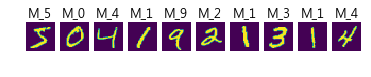

In [6]:
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.title("M_%d" % y_train[i])
    plt.axis("off")
    plt.imshow(x_train[i].reshape(28, 28), cmap=None)
plt.show()

### 將圖像尺寸正規化

In [7]:
x_train = x_train.reshape(60000, 784).astype('float32')
x_test = x_test.reshape(10000, 784).astype('float32')
x_train /= 255
x_test /= 255

## 將判定值帶入

In [8]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### 顯示以確認

In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


### 製作模型
#### 第1組

In [11]:
model = Sequential()
model.add(Dense(512, input_shape=(784, )))
model.add(Activation('relu'))
model.add(Dropout(0.2))

In [12]:
#### 第2組

In [13]:
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

In [14]:
#### 第3組

In [15]:
model.add(Dense(10))
model.add(Activation('softmax'))

## 輸出摘要

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
__________

### 編譯模型

In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

### 提早學習結束條件（EarlyStopping）

In [20]:
es = EarlyStopping(monitor='val_loss', patience=2)
csv_logger = CSVLogger('training.log')
hist = model.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_split=0.1,
                 callbacks=[es, csv_logger])

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 4s 82us/step - loss: 0.0443 - acc: 0.9862 - val_loss: 0.0782 - val_acc: 0.9822
Epoch 2/20
54000/54000 [==============================] - 5s 89us/step - loss: 0.0383 - acc: 0.9881 - val_loss: 0.0731 - val_acc: 0.9837
Epoch 3/20
54000/54000 [==============================] - 5s 97us/step - loss: 0.0328 - acc: 0.9900 - val_loss: 0.0845 - val_acc: 0.9798
Epoch 4/20
54000/54000 [==============================] - 6s 104us/step - loss: 0.0314 - acc: 0.9908 - val_loss: 0.0871 - val_acc: 0.9802


### 進行學習

In [21]:
score = model.evaluate(x_test, y_test, verbose=0)
print('test loss:', score[0])
print('test acc:', score[1])

test loss: 0.09063614707124015
test acc: 0.9802


### 顯示學習結果

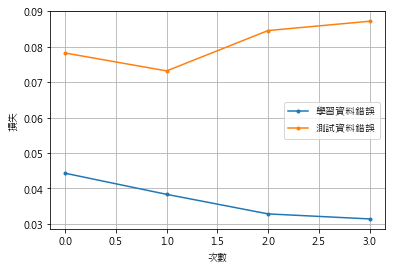

In [22]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='學習資料錯誤')
plt.plot(range(epochs), val_loss, marker='.', label='測試資料錯誤')
plt.legend(loc='best')
plt.grid()
plt.xlabel('次數')
plt.ylabel('損失')
plt.show()